In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
datairis=pd.read_csv("iris.csv")

datairis

data Analysis


In [5]:
datairis.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
datairis.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
datairis.Species.value_counts().to_frame()

,Species
Iris-setosa,50
Iris-virginica,50
Iris-versicolor,50


In [9]:
datairis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
datairis.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [13]:
datairis.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [15]:
datairis['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
datairis.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Visualising the Data


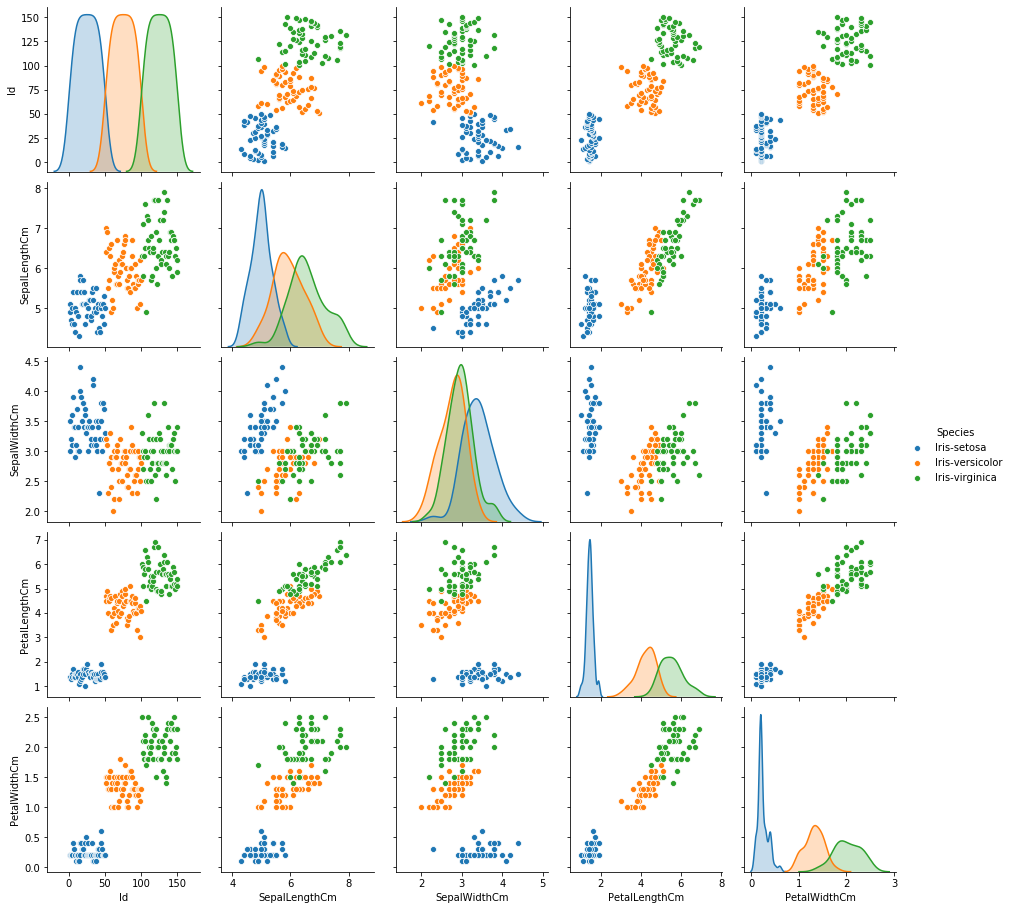

In [21]:
sns.pairplot(datairis,hue='Species')

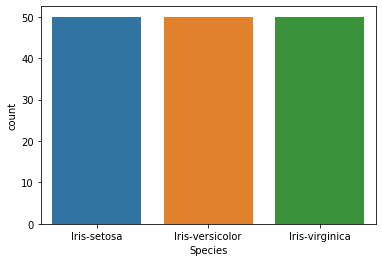

In [22]:
sns.countplot('Species',data=datairis)

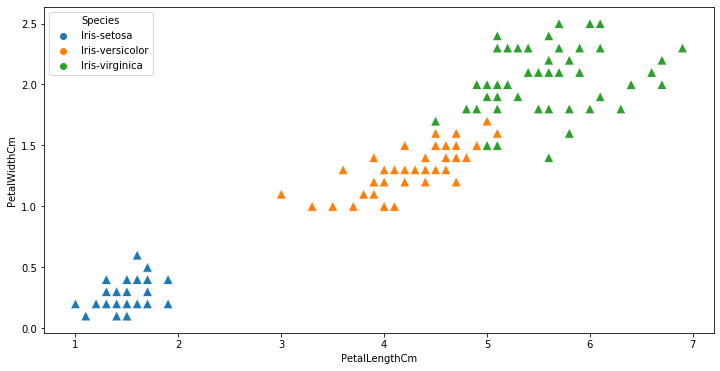

In [25]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=datairis['PetalLengthCm'],y=datairis['PetalWidthCm'],hue=datairis['Species'],marker='^',s = 100)

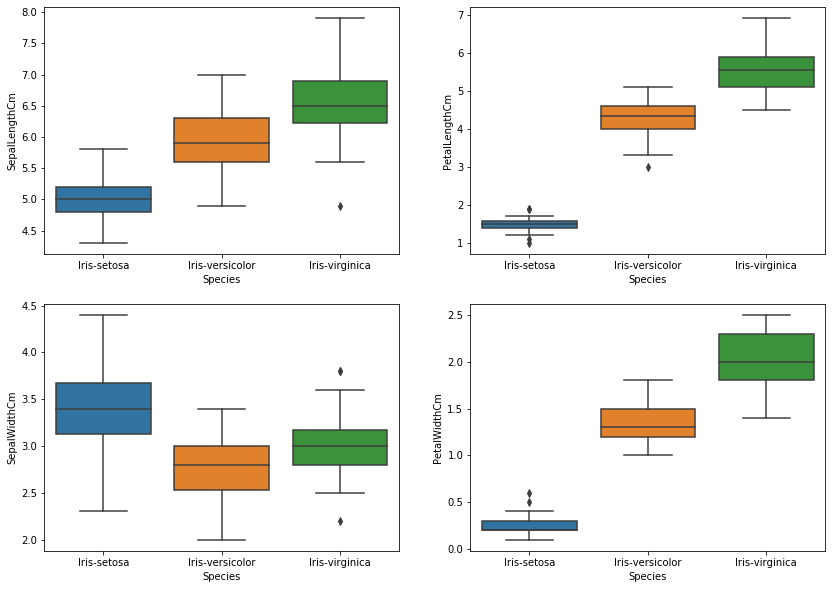

In [24]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.boxplot(y=datairis['SepalLengthCm'],x=datairis['Species'],data=datairis)
plt.subplot(2,2,2)
sns.boxplot(y=datairis['PetalLengthCm'],x=datairis['Species'],data=datairis)
plt.subplot(2,2,3)
sns.boxplot(y=datairis['SepalWidthCm'],x=datairis['Species'],data=datairis)
plt.subplot(2,2,4)
sns.boxplot(y=datairis['PetalWidthCm'],x=datairis['Species'],data=datairis)

Building a Machine Learning Model

In [27]:
x =datairis.iloc[ : , 1:5].values
y =datairis['Species']

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=3)

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
KM = KMeans(n_clusters=3)
KM.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
print(KM.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [32]:
KM.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [33]:
SSE= []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(x_train,y_train)
    SSE.append(kmeans.inertia_)

Text(0, 0.5, 'Sum of Squared error')

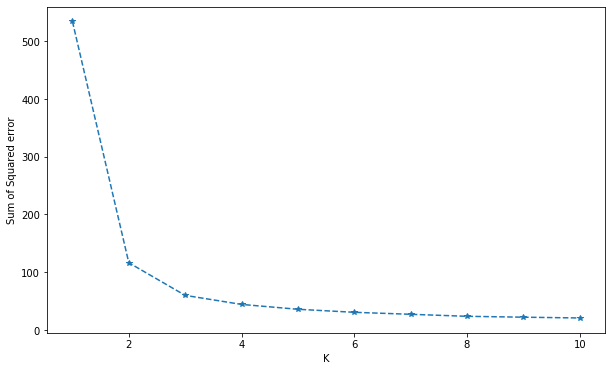

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),SSE,'*--')
plt.xlabel('K')
plt.ylabel('Sum of Squared error')

In [38]:
Y_predict = kmeans.fit_predict(x)

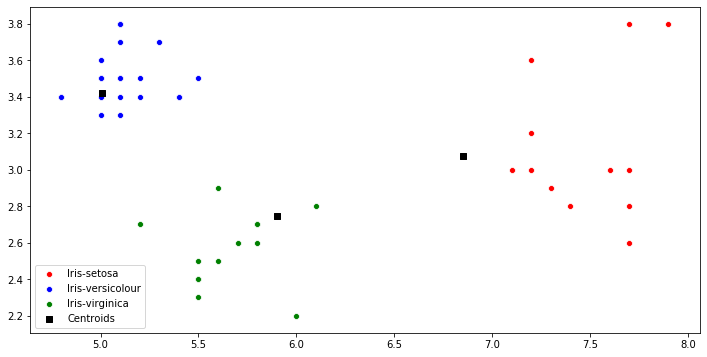

In [39]:
plt.figure(figsize=(12,6))
sns.scatterplot(x[Y_predict == 0, 0], x[Y_predict == 0, 1],color = 'red', label = 'Iris-setosa')
sns.scatterplot(x[Y_predict == 1, 0], x[Y_predict == 1, 1],color = 'blue', label = 'Iris-versicolour')
sns.scatterplot(x[Y_predict == 2, 0], x[Y_predict == 2, 1],color = 'green', label = 'Iris-virginica')         

#centroids of the clusters
plt.scatter(KM.cluster_centers_[:, 0],KM.cluster_centers_[:,1],marker='s' ,color = 'black', label = 'Centroids')
plt.legend()